## 목적 : 대한민국 출산 시계열 예측
## 기술 : Python, fbProphet, Pandas
## 내용 : (1981~2020.04) 통계청 출산 데이터를 통해, 
## 2050년(미래)대한민국 신생아 출산 예측

In [84]:
import pandas as pd
from fbprophet import Prophet

In [85]:
df = pd.read_excel('대한민국_전국_월별_출생.xlsx', encoding='utf-8')
df

,year_month,birth
0,1981-01-01,88151
1,1981-02-01,93556
2,1981-03-01,70421
3,1981-04-01,66093
4,1981-05-01,68940
...,...,...
467,2019-12-01,21136
468,2020-01-01,26818
469,2020-02-01,22854
470,2020-03-01,24378


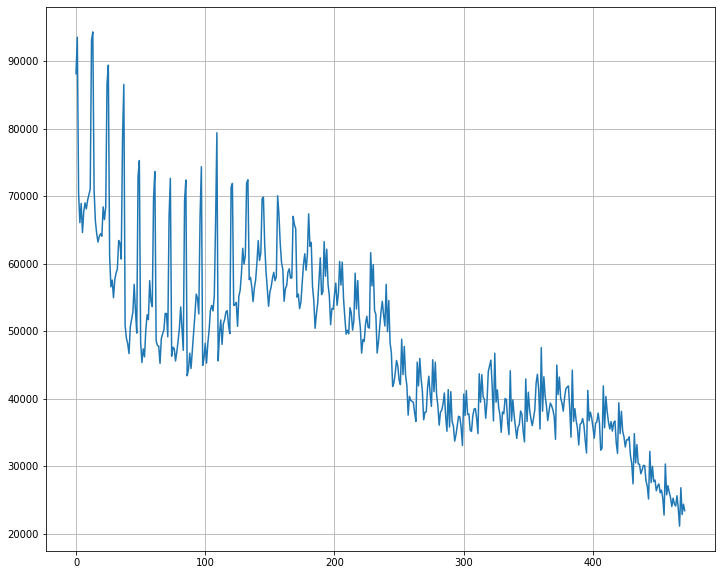

In [86]:
df['birth'].plot(figsize=(12, 10), grid=True) #그래프 사이즈, Grid= 격자

In [87]:
#출생률은 곤두박질 치고 있다.. ㅠㅠ

In [88]:
#ds 만들기
df = pd.DataFrame({
    'ds': df['year_month'], #여기 인덱스는 date로 들어감
    'y' : df['birth'] #숫자값-> 넣어줌
}) #칼럼 만들기

In [89]:
df

,ds,y
0,1981-01-01,88151
1,1981-02-01,93556
2,1981-03-01,70421
3,1981-04-01,66093
4,1981-05-01,68940
...,...,...
467,2019-12-01,21136
468,2020-01-01,26818
469,2020-02-01,22854
470,2020-03-01,24378


In [90]:
m = Prophet(weekly_seasonality=True)#시계열분석 예측 객체

In [91]:
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [92]:
future = m.make_future_dataframe(periods=14000)
future

,ds
0,1981-01-01
1,1981-02-01
2,1981-03-01
3,1981-04-01
4,1981-05-01
...,...
14467,2058-07-27
14468,2058-07-28
14469,2058-07-29
14470,2058-07-30


In [93]:
forecast = m.predict(future)

In [94]:
forecast #예측한것

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,73025.545474,76007.600440,86960.516203,73025.545474,73025.545474,8467.260806,8467.260806,8467.260806,-267.925164,-267.925164,-267.925164,8735.185971,8735.185971,8735.185971,0.0,0.0,0.0,81492.806281
1,1981-02-01,72700.640005,74082.178522,85130.791252,72700.640005,72700.640005,6931.847610,6931.847610,6931.847610,-239.713503,-239.713503,-239.713503,7171.561114,7171.561114,7171.561114,0.0,0.0,0.0,79632.487615
2,1981-03-01,72407.177000,67381.238305,78703.143773,72407.177000,72407.177000,740.962307,740.962307,740.962307,-239.713503,-239.713503,-239.713503,980.675810,980.675810,980.675810,0.0,0.0,0.0,73148.139306
3,1981-04-01,72082.271530,65010.907079,76083.313383,72082.271530,72082.271530,-1548.761215,-1548.761215,-1548.761215,317.013259,317.013259,317.013259,-1865.774475,-1865.774475,-1865.774475,0.0,0.0,0.0,70533.510315
4,1981-05-01,71767.846882,64127.006941,74994.643630,71767.846882,71767.846882,-2285.898761,-2285.898761,-2285.898761,55.385865,55.385865,55.385865,-2341.284625,-2341.284625,-2341.284625,0.0,0.0,0.0,69481.948121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,2058-07-27,-33498.942802,-118323.470574,53677.595817,-114803.501436,57446.876879,-3744.069709,-3744.069709,-3744.069709,-465.343983,-465.343983,-465.343983,-3278.725726,-3278.725726,-3278.725726,0.0,0.0,0.0,-37243.012511
14468,2058-07-28,-33503.184054,-118338.185385,53745.604105,-114813.472649,57452.289898,-3180.861774,-3180.861774,-3180.861774,-239.713503,-239.713503,-239.713503,-2941.148270,-2941.148270,-2941.148270,0.0,0.0,0.0,-36684.045827
14469,2058-07-29,-33507.425305,-116104.957777,55355.181184,-114823.443861,57457.702917,-2251.755455,-2251.755455,-2251.755455,362.530811,362.530811,362.530811,-2614.286266,-2614.286266,-2614.286266,0.0,0.0,0.0,-35759.180760
14470,2058-07-30,-33511.666557,-117043.538736,55938.444175,-114833.415073,57463.115935,-2069.890932,-2069.890932,-2069.890932,238.052715,238.052715,238.052715,-2307.943647,-2307.943647,-2307.943647,0.0,0.0,0.0,-35581.557489


In [95]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
14467,2058-07-27,-37243.012511,-118323.470574,53677.595817
14468,2058-07-28,-36684.045827,-118338.185385,53745.604105
14469,2058-07-29,-35759.180760,-116104.957777,55355.181184
14470,2058-07-30,-35581.557489,-117043.538736,55938.444175
14471,2058-07-31,-35230.216577,-117523.202289,56221.347603


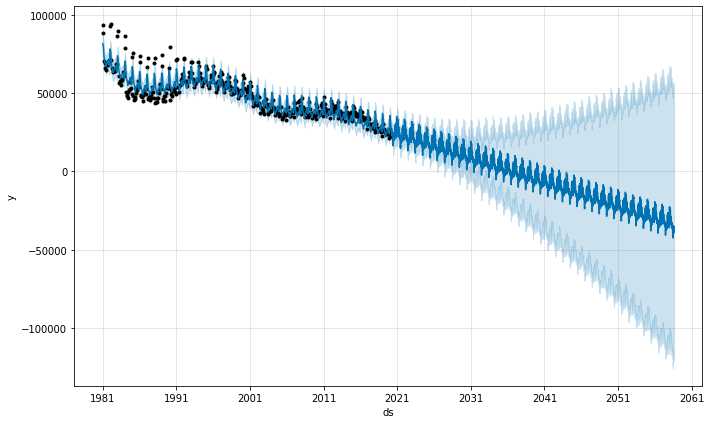

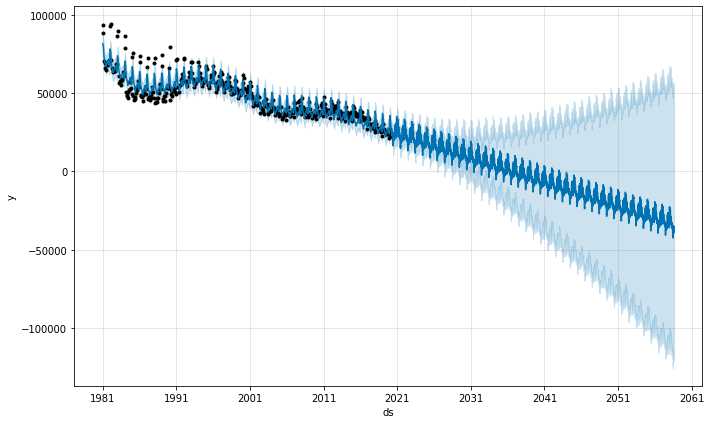

In [96]:
m.plot(forecast)

#검정색 -> 실제데이터
#파란색 -> 예측데이터 

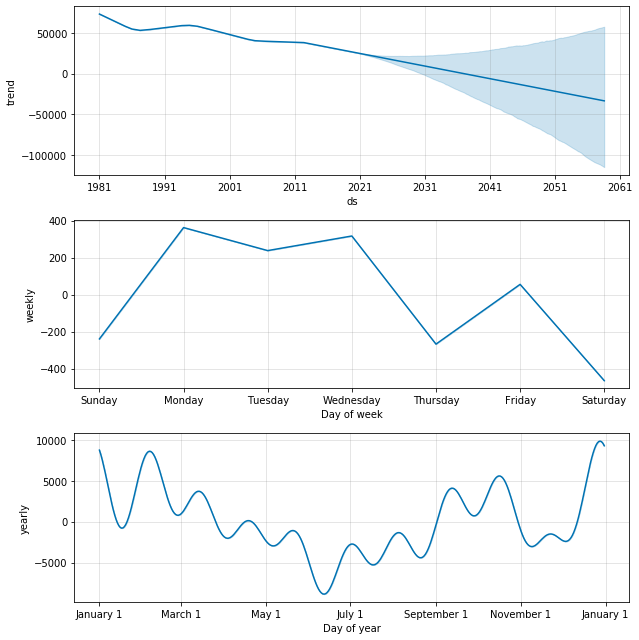

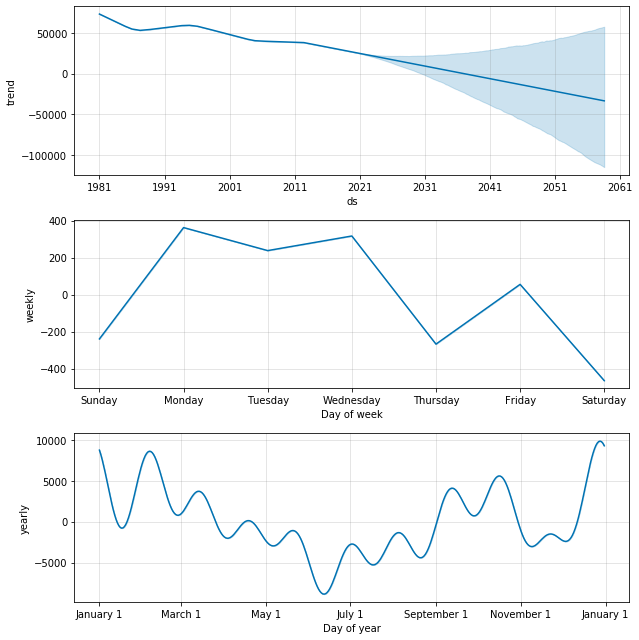

In [97]:
m.plot_components(forecast) #그래프화 하여, 해당 데이터들의 지표를 그래프로 보여줌